In [1]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
from skimage import transform, filters
import sys, os
import urllib

% matplotlib inline

%load_ext autoreload
%autoreload 2

import caffe

from helpers import *
from heatmaps import *
from optimize_mask import *
from pointing_game import *
from defaults import voc_labels_desc

In [2]:
gpu = 0

caffe.set_device(gpu)
caffe.set_mode_gpu()

In [3]:
net = get_net('googlenet_voc')

In [4]:
voc_dir = '/data/ruthfong/VOCdevkit/VOC2007/'
labels_desc = voc_labels_desc
(paths, labels) = read_imdb(os.path.join(voc_dir, 'caffe/test.txt'))
ann_dir = os.path.join(voc_dir, 'Annotations')
ann_paths = np.array([os.path.join(ann_dir, f.strip('.jpg') + '.xml') for f in paths])
paths = np.array([os.path.join(voc_dir, 'JPEGImages', f) for f in paths])

In [7]:
print len(np.unique(paths)), len(paths)

4952 7013


In [8]:
transformer = get_VOC_net_transformer(net)

In [17]:
(accs, num_hits, num_total) = play_pointing_game(net, transformer, paths, labels, ann_paths, 
                                                 'saliency', labels_desc, 
                       top_name = 'loss3/classifier-ft', bottom_name = 'data', norm_deg = np.inf, batch_size = 64, 
                       gpu = gpu)

for i in range(len(labels_desc)):
    print labels_desc[i], accs[i]
print 'mean acc', np.mean(accs)

0/110: 7.8420
1/110: 8.3581
2/110: 9.2668
3/110: 7.4220
4/110: 9.2697
5/110: 9.5883
6/110: 9.1985
7/110: 9.6694
8/110: 9.8213
9/110: 10.0643
10/110: 9.6472
11/110: 8.5063
12/110: 7.4746
13/110: 8.3845
14/110: 9.3004
15/110: 10.2518
16/110: 9.7653
17/110: 8.4550
18/110: 8.8728
19/110: 10.1837
20/110: 9.4098
21/110: 8.9845
22/110: 9.4043
23/110: 9.1103
24/110: 11.1221
25/110: 10.0420
26/110: 9.5616
27/110: 8.2675
28/110: 5.5424
29/110: 7.4637
30/110: 7.6222
31/110: 6.6306
32/110: 8.9807
33/110: 7.6676
34/110: 3.8740
35/110: 2.4745
36/110: 2.6718
37/110: 4.6572
38/110: 3.8406
39/110: 4.9038
40/110: 4.8339
41/110: 4.9532
42/110: 5.0273
43/110: 3.1216
44/110: 4.5340
45/110: 5.2710
46/110: 5.2629
47/110: 5.6406
48/110: 4.3254
49/110: 4.0347
50/110: 4.2162
51/110: 4.1180
52/110: 3.1039
53/110: 4.3674
54/110: 4.7125
55/110: 3.4443
56/110: 3.1588
57/110: 2.6539
58/110: 3.7287
59/110: 3.2938
60/110: 4.0478
61/110: 4.0495
62/110: 4.3631
63/110: 3.4999
64/110: 3.3105
65/110: 3.3108
66/110: 2.3074


In [19]:
for i in range(len(labels_desc)):
    print labels_desc[i], accs[i]
print 'mean acc', np.mean(accs)
sal_accs = accs
sal_num_hits = num_hits
sal_num_total = num_total

aeroplane 0.774509803922
bicycle 0.598326359833
bird 0.836879432624
boat 0.651162790698
bottle 0.283018867925
bus 0.666666666667
car 0.53814147018
cat 0.866459627329
chair 0.342925659472
cow 0.929133858268
diningtable 0.621052631579
dog 0.894736842105
horse 0.916058394161
motorbike 0.702702702703
person 0.503736920777
pottedplant 0.441964285714
sheep 0.948453608247
sofa 0.735426008969
train 0.822393822394
tvmonitor 0.336244541485
mean acc 0.670499714753


In [21]:
(accs, num_hits, num_total) = play_pointing_game(net, transformer, paths, labels, ann_paths, 
                                                 'guided_backprop', labels_desc, 
                       top_name = 'loss3/classifier-ft', bottom_name = 'data', norm_deg = np.inf, batch_size = 64, 
                       gpu = gpu)

for i in range(len(labels_desc)):
    print labels_desc[i], accs[i]
print 'mean acc', np.mean(accs)

0/110: 9.6476
1/110: 8.3957
2/110: 8.5628
3/110: 8.6846
4/110: 10.2545
5/110: 9.6652
6/110: 9.5243
7/110: 8.6263
8/110: 9.5955
9/110: 9.5704
10/110: 9.2270
11/110: 8.6435
12/110: 8.6445
13/110: 8.6685
14/110: 10.8645
15/110: 10.3207
16/110: 10.0791
17/110: 9.0251
18/110: 8.8151
19/110: 7.6840
20/110: 9.4030
21/110: 7.3125
22/110: 8.6452
23/110: 9.5077
24/110: 8.4778
25/110: 7.8043
26/110: 8.6017
27/110: 9.0167
28/110: 9.5099
29/110: 9.7189
30/110: 8.8985
31/110: 11.1002
32/110: 9.9378
33/110: 8.8808
34/110: 9.5209
35/110: 10.0590
36/110: 9.2101
37/110: 8.9082
38/110: 7.7661
39/110: 9.7191
40/110: 9.3241
41/110: 8.7996
42/110: 9.2030
43/110: 8.4950
44/110: 8.8450
45/110: 9.5663
46/110: 9.4266
47/110: 10.4591
48/110: 9.5377
49/110: 7.1565
50/110: 7.1396
51/110: 6.9808
52/110: 7.3444
53/110: 7.6374
54/110: 7.6853
55/110: 8.3734
56/110: 7.5864
57/110: 7.7283
58/110: 8.2927
59/110: 9.6127
60/110: 10.7765
61/110: 7.4209
62/110: 9.1648
63/110: 8.9762
64/110: 2.3989
65/110: 2.3154
66/110: 3.47

In [31]:
guided_accs = accs
guided_num_hits = num_hits
guided_num_total = num_total

In [34]:
(accs, num_hits, num_total) = play_pointing_game(net, transformer, paths, labels, ann_paths, 
                                                 'center', labels_desc, 
                       top_name = 'loss3/classifier-ft', bottom_name = 'data', norm_deg = np.inf, batch_size = 64, 
                       gpu = gpu)

for i in range(len(labels_desc)):
    print labels_desc[i], accs[i]
print 'mean acc', np.mean(accs)

0/110: 2.7633
1/110: 2.9681
2/110: 2.8486
3/110: 2.6105
4/110: 3.4032
5/110: 2.1736
6/110: 3.1239
7/110: 2.2651
8/110: 2.8455
9/110: 2.4477
10/110: 2.2263
11/110: 2.5170
12/110: 2.2674
13/110: 2.5478
14/110: 2.6095
15/110: 3.4250
16/110: 3.9668
17/110: 2.2823
18/110: 1.7795
19/110: 2.5269
20/110: 1.6277
21/110: 1.2454
22/110: 1.8580
23/110: 1.8989
24/110: 1.6840
25/110: 2.3902
26/110: 2.2983
27/110: 2.1140
28/110: 3.0094
29/110: 4.0918
30/110: 4.8361
31/110: 3.8918
32/110: 3.6593
33/110: 3.3516
34/110: 2.7026
35/110: 2.7572
36/110: 3.0745
37/110: 4.0144
38/110: 4.3082
39/110: 4.4956
40/110: 2.7856
41/110: 4.5434
42/110: 4.7499
43/110: 4.1262
44/110: 3.8626
45/110: 5.0893
46/110: 5.3981
47/110: 4.4948
48/110: 3.4046
49/110: 3.6030
50/110: 3.4331
51/110: 3.1949
52/110: 3.2661
53/110: 3.9449
54/110: 3.0607
55/110: 3.1650
56/110: 3.2286
57/110: 2.4182
58/110: 3.7418
59/110: 4.3109
60/110: 4.4172
61/110: 4.5369
62/110: 4.8875
63/110: 4.9156
64/110: 3.9636
65/110: 3.7973
66/110: 4.9883
67/11

In [39]:
print num_hits
print np.sum(num_hits) / float(np.sum(num_total))

[  165.   130.   209.   103.    47.   136.   454.   274.   132.    81.
    97.   325.   245.   171.  1257.    85.    64.   148.   222.    82.]
0.631256238414


In [9]:
ind = 1
img_path = paths[ind]
ann_path = ann_paths[ind]
label = labels[ind]

In [10]:
heatmap = compute_heatmap(net, transformer, img_path, label, heatmap_type = 'saliency', topBlobName = 'loss3/classifier-ft', 
                topLayerName = 'loss3/classifier-ft',
                    outputBlobName = 'data', outputLayerName = 'data', secondTopBlobName = 'pool5/7x7_s1',
                    secondTopLayerName = 'pool5/7x7_s1', norm_deg = np.inf, gpu = 0)

(250, 183)
[53, 117, 458, 231]


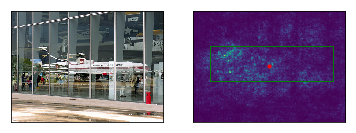

In [11]:
resize = caffe.io.load_image(img_path).shape[:2]
f, ax = plt.subplots(1,2)
ax[0].imshow(caffe.io.load_image(img_path))
ax[1].imshow(imresize(heatmap, resize))
for a in ax:
    a.set_xticks([])
    a.set_yticks([])
m = (resize[1]/2, resize[0]/2)
#m = get_maximum_from_heatmap(heatmap, resize)
print m
ax[1].add_artist(plt.Circle((m[0], m[1]), 5, color='r'))
objs = load_objs(ann_path)
target_objs = objs[labels_desc[label]]

#for k in objs.keys():
#    print k
for i in range(len(target_objs)):
    bb_coords = target_objs[i]
    is_hit = bb_coords[0] <= m[0] and bb_coords[1] <= m[1] and bb_coords[2] >= m[0] and bb_coords[3] >= m[1]
    rect = patches.Rectangle((bb_coords[0],bb_coords[1]),bb_coords[2]-bb_coords[0],bb_coords[3]-bb_coords[1],
                 linewidth=1,edgecolor= 'g' if is_hit else 'r',facecolor='none')
    ax[1].add_patch(rect)
    print bb_coords
plt.show()

In [14]:
len(np.unique(objs.keys())) > 1

True

In [16]:
z = 0
z += 1 if True else False
print z

1
